In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



### Data(X) -> Acidity of milk
### Data(Y) -> Density of milk

In [13]:
def readData(filename):
    # df stands for data frame
    df = pd.read_csv(filename)
    # Treat df as a table
    return df.values     ## Converts it into a numpy array and returns that array.

x = readData("/Volumes/part3/Data_Milk_Regression1/linearX.csv")
print(x.shape)
x = x.reshape((99,))
print(x.shape)
print()
print(x)
print() 
print()
y = readData("/Volumes/part3/Data_Milk_Regression1/linearY.csv")
y = y.reshape((99,))
print(y)

(99, 1)
(99,)

[ 8.   9.1  8.4  6.9  7.7 15.6  7.3  7.   7.2 10.1 11.5  7.1 10.   8.9
  7.9  5.6  6.3  6.7 10.4  8.5  7.4  6.3  5.4  8.9  9.4  7.5 11.9  7.8
  7.4 10.8 10.2  6.2  7.7 13.7  8.   6.7  6.7  7.   8.3  7.4  9.9  6.1
  7.   5.4 10.7  7.6  8.9  9.2  6.6  7.2  8.   7.8  7.9  7.   7.   7.6
  9.1  9.   7.9  6.6 11.9  6.5  7.1  8.8  7.5  7.7  6.  10.6  6.6  8.2
  7.9  7.1  5.6  6.4  7.5  9.8  7.  10.5  7.1  6.2  6.5  7.7  7.2  9.3
  8.5  7.7  6.8  7.8  8.7  9.6  7.2  9.3  8.1  6.6  7.8 10.2  6.1  7.3
  7.3]


[0.99007 0.99769 0.99386 0.99508 0.9963  1.0032  0.99768 0.99584 0.99609
 0.99774 1.0003  0.99694 0.99965 0.99549 0.99364 0.99378 0.99379 0.99524
 0.9988  0.99733 0.9966  0.9955  0.99471 0.99354 0.99786 0.9965  0.9988
 0.9964  0.99713 0.9985  0.99565 0.99578 0.9976  1.0014  0.99685 0.99648
 0.99472 0.99914 0.99408 0.9974  1.0002  0.99402 0.9966  0.99402 1.0029
 0.99718 0.9986  0.9952  0.9952  0.9972  0.9976  0.9968  0.9978  0.9951
 0.99629 0.99656 0.999   0.99836 0.99396 0.9

#Plotting the Data

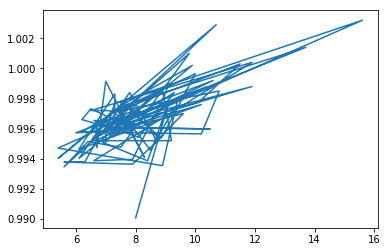

In [14]:
plt.plot(x,y)

##How does plot work?


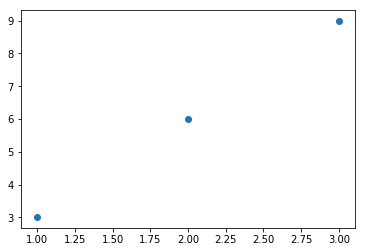

In [17]:
a=[1,2,3]
b=[3,6,9]

plt.scatter(a,b)

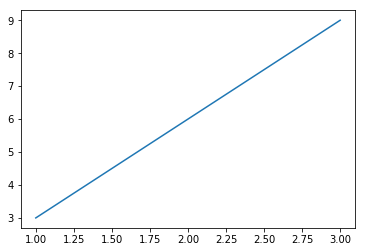

In [18]:
plt.plot(a,b)   # 1 is mapped to 3 , 2 with 6 and so on

#Coming back to our code


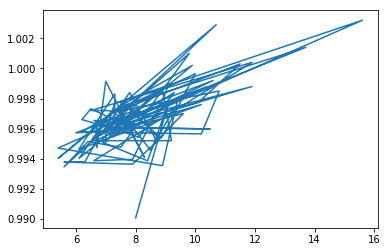

In [19]:
plt.plot(x,y)

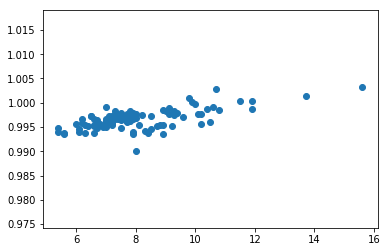

In [20]:
plt.scatter(x,y)

1.728627857571563


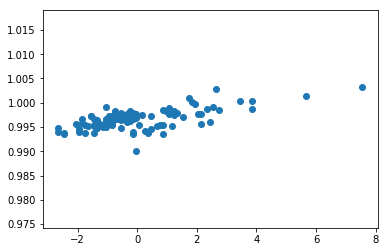

In [33]:
##Normalisation --> Make mean=0 and standard deviation = 1
##It is done so that data doesn;t get crowded at one place and becomes scattered so that
##we can see it clearly

## It also brings data near origin --> convergance will come fast
#print(x.std())
x = x-x.mean()/(x.std())

plt.scatter(x,y)  # Check that data is near origin
plt.show()

In [34]:
print(x.shape)

(99,)


In [73]:
## Linear Regression Algorithm

X = x
Y = y

def hypothesis(theta , x):   
    # x is a point.
    # theta is an array
    # This function calculates the hypothesis function
    
    return theta[0] + theta[1]*x   # Since it has only 1 attribute
    
def error(X,Y,theta):
    #X and Y are training sets/data
    
    # Total error is (sigma from 1 to m)(h(x)-y)
    
    total_error = 0 ;
    m = X.shape[0]   # Where m is the number of examples
    
    for i in range(m):
        total_error+=(Y[i] - hypothesis(theta , X[i]))**2
        
    return 0.5*total_error

def CalcGradient(X,Y,theta):
    
    grad = np.array([0.0,0.0])
    m=X.shape[0]
    for i in range(m):
        grad[0]+=hypothesis(theta , X[i]) - Y[i]
        grad[1]+=( hypothesis(theta , X[i]) - Y[i])*X[i]      
    
    return grad


def gradientDescent(X,Y,learningRate , maxItr):
    grad = np.array([0.0,0.0])
    # It stores the 2 gradients dJ(theta)/dtheta0 and dJ(theta)/dtheta1
    
    theta = np.array([0.0,0.0])
    # It stores theta0 and theta 1
    e=[]
    for i in range(maxItr):
        grad = CalcGradient(X,Y,theta)
        
        # theta = theta - (learningRate)*(gradient)
                   
            
        ce = error(X,Y,theta)    
        theta[0]-=(learningRate)*grad[0]
        theta[1]-=(learningRate)*grad[1]
        e.append(ce)
        
        
        
    return theta,e
        
theta,e = gradientDescent(X,Y,0.001,80)
print(theta[0] , theta[1])
                   
                   


0.9963961731520483 0.0007855593456454964


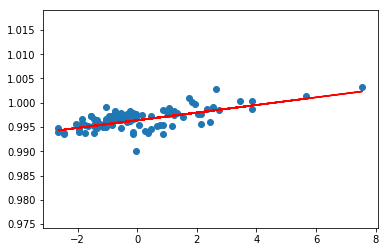

In [71]:
plt.scatter(X,Y)
plt.plot(X,hypothesis(theta , X),color='r')
plt.show()

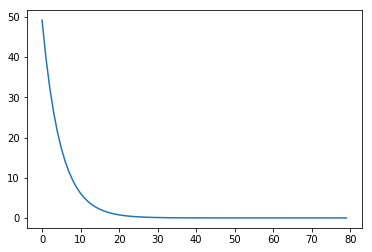

In [72]:
plt.plot(e)